In [1]:
#importação das bibliotecas
import numpy as np
from matplotlib import pyplot as plt


In [14]:
#Parâmetros da medição
fs = 2000       #Frequência de amostragem
dur = 5         #Duração da medição

t1 = 0.3    #atraso t1 (microfone B)          
t2 = 0.5    #atraso t2 (reflexão)
a = 1       #fator de distância A (microfone A)
b = 0.52    #fator de distância B (microfone B - som direto)
c = 0.33    #fator de distância C (microfone B - som refletido)

l1 = 0.2    #nível do ruído do microfone A
l2 = 0.3    #nível do ruído do microfone B



In [15]:
#Geração dos sinais aleatórios (s e ruídos)
t = np.arange(0, dur, 1/fs) #vetor temporal

s = np.random.normal(0,1,len(t))        #sinal s(t)
n1 = l1*np.random.normal(0,1,len(t))    #ruído do microfone A
n2 = l2*np.random.normal(0,1,len(t))    #ruído do microfone A

(-4.0, 4.0)

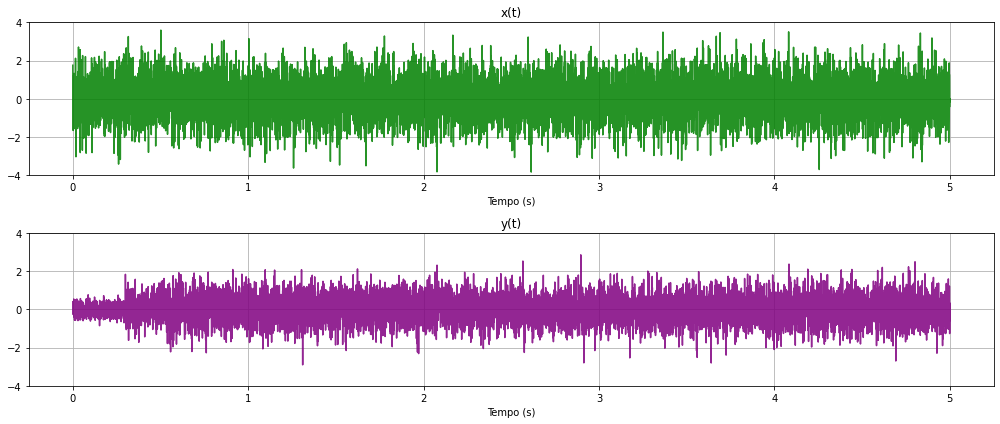

In [51]:
#Geração dos sinais gravados
x = a*s + n1                #Sinal x(t)

y = np.zeros(len(t)) + n2                   #Inicialização do sinal y(t) apenas com o ruído
y[int(t1*fs):] += b*s[:len(s)-int(t1*fs)]   #Adição do som direto
y[int(t2*fs):] += c*s[:len(s)-int(t2*fs)]   #Adição do som refletido

#Gráfico dos sinais x(t) e y(t)
plt.figure(figsize=(14, 6), tight_layout = 'True')

plt.subplot(2,1,1)
plt.plot(t, x, color = 'green', alpha=0.85)
plt.xlabel('Tempo (s)')
plt.grid()
plt.title('x(t)')
plt.ylim([-4,4])

plt.subplot(2,1,2)
plt.plot(t, y, color = 'purple', alpha=0.85)
plt.xlabel('Tempo (s)')
plt.grid()
plt.title('y(t)')
plt.ylim([-4,4])

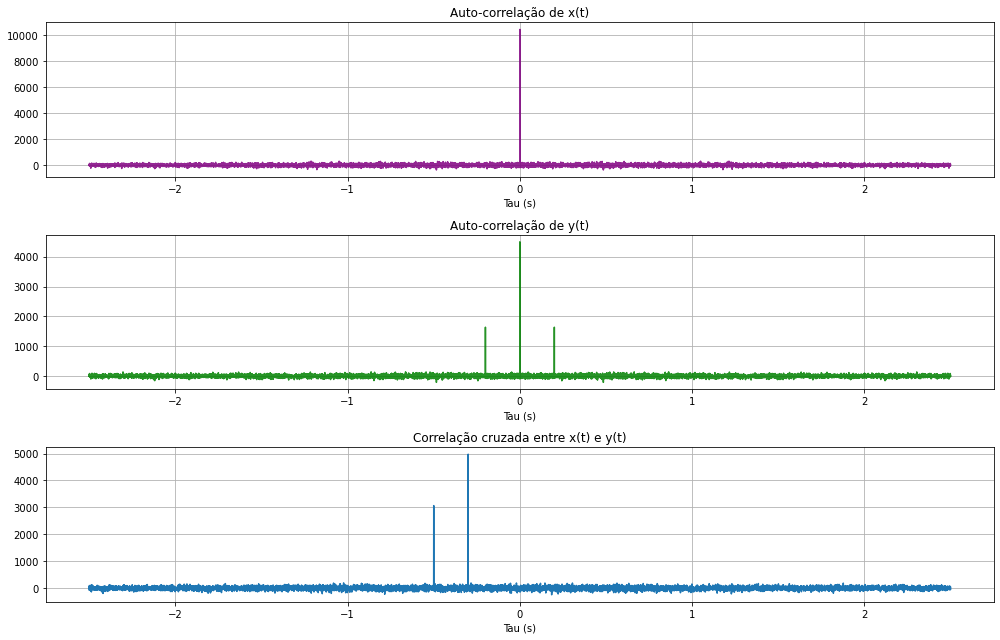

In [53]:
#Cálculo das correlações
Rxx = np.correlate(x,x,'same')
Ryy = np.correlate(y,y,'same')
Rxy = np.correlate(x,y,'same')

tau = np.linspace(-0.5*len(Rxx)/fs,0.5*len(Rxx)/fs, len(Rxx))   #vetor de atraso Tau


#Gráfico das correlações
plt.figure(figsize=(14, 9), tight_layout = 'True')

plt.subplot(3,1,1)
plt.plot(tau, Rxx, color = 'purple', alpha=0.85)
plt.xlabel('Tau (s)')
plt.grid()
plt.title('Auto-correlação de x(t)')

plt.subplot(3,1,2)
plt.plot(tau, Ryy, color = 'green', alpha=0.85)
plt.xlabel('Tau (s)')
plt.grid()
plt.title('Auto-correlação de y(t)')

plt.subplot(3,1,3)
plt.plot(tau,Rxy)
plt.xlabel('Tau (s)')
plt.grid()
plt.title('Correlação cruzada entre x(t) e y(t)')

plt.show()
